# Carbon Emissions from Land Use Change (ELUC)
ELUC: Carbon Emissions from Land Use Change (ELUC), produced by the BLUE model [1]  
BLUE: Bookkeeping of land use emissions

See [Relevance of methodological choices for accounting of land use change carbon fluxes](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2014GB004997)

TODO: validate what ELUC represents in this file:
1. the simulated carbon fluxes occurring in that year (methods #1, #2 and #4)
2. or the fluxes committed by transitions occurring in that year (methods #3 and #5)  

See section 2.3.2 Data Postprocessing - Legacy Model Runs  

In order to make land use change recommendations (prescriptions) to minimize ELUC we need ELUC to represent 2.

ELUC is one of the elements of the [Global Carbon Budget](https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022.html) equation:

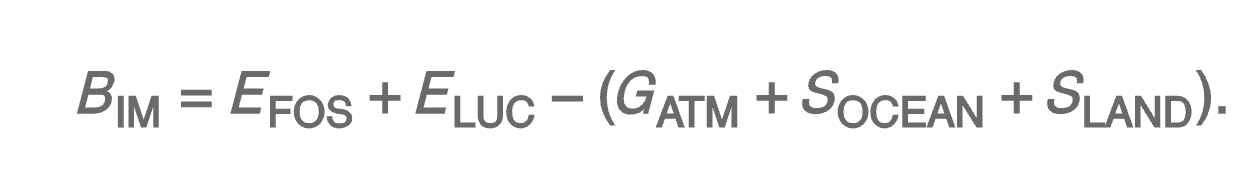

Reference:  
[1] “Estimates based on the BLUE model by Hansis, E., Davis, S., Pongratz, J. (2015). Relevance of methodological choices for accounting of land use change carbon fluxes, Global Biogeochemical Cycles, 2015, 10.1002/2014GB004997, as updated by Friedlingstein et al. (2022). Global Carbon Budget 2022, Earth System Science Data, [https://doi.org/10.5194/essd-14-4811-2022](https://doi.org/10.5194/essd-14-4811-2022)"


In [ ]:
# You might want to install:
# %pip install xarray
# %pip install netcdf4
# %pip install matplotlib
# If you're on macOS, before installing Cartopy: brew install geos
# %pip install Cartopy

In [1]:
import numpy as np
import os
import pandas as pd
import requests
import xarray as xr

In [2]:
ELUC_DATASET_FILE = os.path.join("raw", "BLUE_LUH2-GCB2022_ELUC_gridded_net_1850-2021.nc")

In [3]:
# Download the data if needed
if not os.path.isfile(ELUC_DATASET_FILE):
    url = "https://syncandshare.lrz.de/dl/fiAuJz5VFgsEJ1E96mthCT/Data_GCB2022/BLUE_LUH2-GCB2022_ELUC_gridded_net_1850-2021.nc"
    response = requests.get(url)
    with open(ELUC_DATASET_FILE, 'wb') as f:
        f.write(response.content)

In [4]:
eluc_ds = xr.open_dataset(ELUC_DATASET_FILE)
eluc_ds

<xarray.Dataset>
Dimensions:    (lat: 720, lon: 1440, time: 172)
Coordinates:
  * lat        (lat) float32 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time       (time) int32 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021
Data variables:
    ELUC       (time, lat, lon) float32 ...
    cell_area  (lat, lon) float32 ...

In [5]:
eluc_ds.ELUC.dims

('time', 'lat', 'lon')

In [6]:
eluc_ds.ELUC.attrs

{'standard_name': 'Carbon emissions from land use change',
 'long_name': 'Carbon emissions from land use change',
 'units': 't C/ha/yr'}

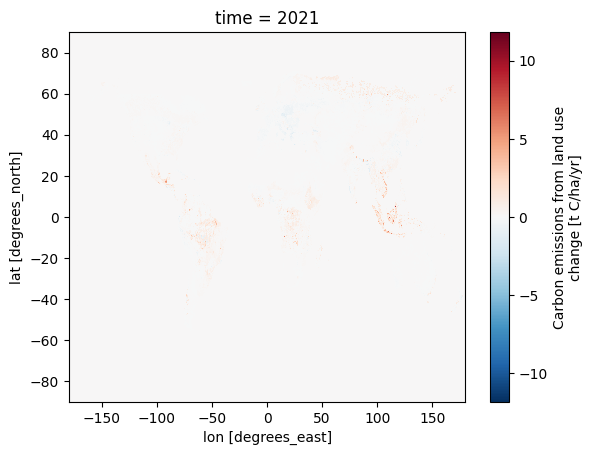

In [7]:
eluc_ds.ELUC.sel(time=2021).plot(x="lon");

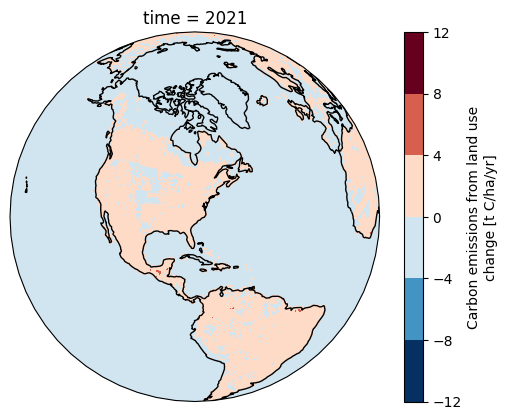

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Center on america
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
eluc_ds.ELUC.sel(time=2021).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

# plt.savefig('cartopy_example.png')

In [9]:
# Carbon Emissions from land use change
# For London in 2021, closest cell to entered coordinates
eluc_ds.ELUC.sel(lat=51.507, lon=-0.127, time=2021, method="nearest")

<xarray.DataArray 'ELUC' ()>
[1 values with dtype=float32]
Coordinates:
    lat      float32 51.62
    lon      float32 -0.125
    time     int32 2021
Attributes:
    standard_name:  Carbon emissions from land use change
    long_name:      Carbon emissions from land use change
    units:          t C/ha/yr

In [10]:
eluc_ds.ELUC.sel(lat=51.507, lon=-0.127, time=2021, method="nearest").values

array(0.0151329, dtype=float32)

In [11]:
# Creates a 5.8G csv file
# eluc_df = eluc_ds.to_dataframe()
# eluc_df.to_csv("processed/eluc.csv")

In [12]:
# Be patient, eluc.csv is a 5.8g file
eluc_df = pd.read_csv("processed/eluc.csv")
eluc_df.head()

,lat,lon,time,ELUC,cell_area
0,89.875,-179.875,1850,0.0,168.59187
1,89.875,-179.875,1851,0.0,168.59187
2,89.875,-179.875,1852,0.0,168.59187
3,89.875,-179.875,1853,0.0,168.59187
4,89.875,-179.875,1854,0.0,168.59187


# LUH2: Land-Use Harmonization
See https://luh.umd.edu/  
The LUH2 model and datasets prepared for CMIP6 are described in [Hurtt et al. 2020.](https://gmd.copernicus.org/articles/13/5425/2020/gmd-13-5425-2020-discussion.html)


Land-use Harmonization (LUH) data for GCB 2022 is provided in 3 separate files, which can be downloaded from the following links (for the states, transitions, and management data layers respectively):

http://luh.umd.edu/LUH2/LUH2_GCB_2022/states.nc  
http://luh.umd.edu/LUH2/LUH2_GCB_2022/transitions.nc  
http://luh.umd.edu/LUH2/LUH2_GCB_2022/management.nc  

These files are based on the new HYDE3.3, as well as the 2021 FAO wood harvest data, for all years 850-2022.

The data files are for the years 850-2022, which keeps the file format consistent with the LUH2 data produced for CMIP6, hence the start year of 850. The LUH2-GCB2022 data will be different from the LUH2 v2h data used for CMIP6 for all years, due to the use of the new HYDE3.3 crop/grazing land dataset.

## LUH2 States

In [13]:
LUH2_GCB_2022_STATES_FILE = os.path.join("raw", "LUH2_GCB_2022_states.nc")

In [14]:
# Download the data if needed
if not os.path.isfile(LUH2_GCB_2022_STATES_FILE):
    url = "http://luh.umd.edu/LUH2/LUH2_GCB_2022/states.nc"
    response = requests.get(url)
    with open(LUH2_GCB_2022_STATES_FILE, 'wb') as f:
        f.write(response.content)

In [15]:
# NOTE: this is a 6.2G file
states_ds = xr.open_dataset(LUH2_GCB_2022_STATES_FILE, decode_times=False)
states_ds

<xarray.Dataset>
Dimensions:  (time: 1173, lon: 1440, lat: 720)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.17e+03 1.171e+03 1.172e+03
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
Data variables: (12/14)
    primf    (time, lat, lon) float32 ...
    primn    (time, lat, lon) float32 ...
    secdf    (time, lat, lon) float32 ...
    secdn    (time, lat, lon) float32 ...
    urban    (time, lat, lon) float32 ...
    c3ann    (time, lat, lon) float32 ...
    ...       ...
    c4per    (time, lat, lon) float32 ...
    c3nfx    (time, lat, lon) float32 ...
    pastr    (time, lat, lon) float32 ...
    range    (time, lat, lon) float32 ...
    secmb    (time, lat, lon) float32 ...
    secma    (time, lat, lon) float32 ...
Attributes: (12/25)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.6
    institution:             University of Maryland (UofMD), College Park, MD...
    host:                    UMD College Park
    contact:                 gchurtt@umd.edu, lchini@umd.edu, steve.frolking@...
    creation_date:           2022-08-04T11:07:54Z
    ...                      ...
    title:                   UofMD LUH2-GCB2022 dataset prepared for Global C...
    activity_id:             Global Carbon Budget
    dataset_version_number:  LUH2-GCB2022
    source_id:               UofMD-landState-LUH2-GCB2022
    target_mip:              Global Carbon Budget
    references:              Hurtt et al. 2020, Chini et al. 2021

### Dimensions
```
3 dimensions:
    time  Size:1173   *** is unlimited *** 
        axis: T
        calendar: 365_day
        long_name: time
        standard_name: time
        units: years since 850-01-01 0:0:0
    lon  Size:1440 
        standard_name: longitude
        long_name: longitude
        units: degrees_east
        axis: X
    lat  Size:720 
        standard_name: latitude
        long_name: latitude
        units: degrees_north
        axis: Y
```
### Variables
12 land types that sum to 1? Plus secmb (secondary mean biomass carbon density) and scma (secondary mean age)

1. **primf**: primary vegetation on LUH2 potential forest land
1. **primn**: primary vegetation on LUH2 potential non-forest land
1. **secdf**: secondary vegetation on LUH2 potential forest land
1. **secdn**: secondary vegetation on LUH2 potential non-forest land
1. **urban**: urban land
1. **c3ann**: C3 annual crops
1. **c4ann**: C4 annual crops
1. **c3per**: C3 perennial crops
1. **c4per**: C4 perennial crops
1. **c3nfx**: C3 nitrogen-fixing crops
1. **pastr**: managed pasture
1. **range**: rangeland
1. **secmb**: secondary mean biomass carbon density (units: kg m-2)
1. **secma**: secondary mean age


In [16]:
states_ds.sel(lat=51.507, lon=-0.127, time=2021, method="nearest")

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     float64 1.172e+03
    lon      float64 -0.125
    lat      float64 51.62
Data variables: (12/14)
    primf    float32 ...
    primn    float32 ...
    secdf    float32 ...
    secdn    float32 ...
    urban    float32 ...
    c3ann    float32 ...
    ...       ...
    c4per    float32 ...
    c3nfx    float32 ...
    pastr    float32 ...
    range    float32 ...
    secmb    float32 ...
    secma    float32 ...
Attributes: (12/25)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.6
    institution:             University of Maryland (UofMD), College Park, MD...
    host:                    UMD College Park
    contact:                 gchurtt@umd.edu, lchini@umd.edu, steve.frolking@...
    creation_date:           2022-08-04T11:07:54Z
    ...                      ...
    title:                   UofMD LUH2-GCB2022 dataset prepared for Global C...
    activity_id:             Global Carbon Budget
    dataset_version_number:  LUH2-GCB2022
    source_id:               UofMD-landState-LUH2-GCB2022
    target_mip:              Global Carbon Budget
    references:              Hurtt et al. 2020, Chini et al. 2021

In [17]:
# Convert the time coordinate to integer, to match eluc_ds
states_ds['time'] = states_ds['time'].astype(int)

In [18]:
# Add 850 as the time unit is "years since 850-01-01 0:0:0"
states_ds = states_ds.assign_coords(time=states_ds.time + 850)

In [19]:
states_ds

<xarray.Dataset>
Dimensions:  (time: 1173, lon: 1440, lat: 720)
Coordinates:
  * time     (time) int64 850 851 852 853 854 855 ... 2018 2019 2020 2021 2022
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
Data variables: (12/14)
    primf    (time, lat, lon) float32 ...
    primn    (time, lat, lon) float32 ...
    secdf    (time, lat, lon) float32 ...
    secdn    (time, lat, lon) float32 ...
    urban    (time, lat, lon) float32 ...
    c3ann    (time, lat, lon) float32 ...
    ...       ...
    c4per    (time, lat, lon) float32 ...
    c3nfx    (time, lat, lon) float32 ...
    pastr    (time, lat, lon) float32 ...
    range    (time, lat, lon) float32 ...
    secmb    (time, lat, lon) float32 ...
    secma    (time, lat, lon) float32 ...
Attributes: (12/25)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.6
    institution:             University of Maryland (UofMD), College Park, MD...
    host:                    UMD College Park
    contact:                 gchurtt@umd.edu, lchini@umd.edu, steve.frolking@...
    creation_date:           2022-08-04T11:07:54Z
    ...                      ...
    title:                   UofMD LUH2-GCB2022 dataset prepared for Global C...
    activity_id:             Global Carbon Budget
    dataset_version_number:  LUH2-GCB2022
    source_id:               UofMD-landState-LUH2-GCB2022
    target_mip:              Global Carbon Budget
    references:              Hurtt et al. 2020, Chini et al. 2021

In [20]:
states_ds.sel(lat=51.507, lon=-0.127, time=2021, method="nearest")

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    time     int64 2021
    lon      float64 -0.125
    lat      float64 51.62
Data variables: (12/14)
    primf    float32 ...
    primn    float32 ...
    secdf    float32 ...
    secdn    float32 ...
    urban    float32 ...
    c3ann    float32 ...
    ...       ...
    c4per    float32 ...
    c3nfx    float32 ...
    pastr    float32 ...
    range    float32 ...
    secmb    float32 ...
    secma    float32 ...
Attributes: (12/25)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.6
    institution:             University of Maryland (UofMD), College Park, MD...
    host:                    UMD College Park
    contact:                 gchurtt@umd.edu, lchini@umd.edu, steve.frolking@...
    creation_date:           2022-08-04T11:07:54Z
    ...                      ...
    title:                   UofMD LUH2-GCB2022 dataset prepared for Global C...
    activity_id:             Global Carbon Budget
    dataset_version_number:  LUH2-GCB2022
    source_id:               UofMD-landState-LUH2-GCB2022
    target_mip:              Global Carbon Budget
    references:              Hurtt et al. 2020, Chini et al. 2021

## LUH2 Transitions

Exploring the transitions file. Not used for the moment

In [ ]:
LUH2_GCB_2022_TRANSITIONS_FILE = os.path.join("raw", "LUH2_GCB_2022_transitions.nc")

In [ ]:
# Download the data if needed
# NOTE: this a 19G file
if not os.path.isfile(LUH2_GCB_2022_TRANSITIONS_FILE):
    url = "http://luh.umd.edu/LUH2/LUH2_GCB_2022/transitions.nc"
    response = requests.get(url)
    with open(LUH2_GCB_2022_TRANSITIONS_FILE, 'wb') as f:
        f.write(response.content)

In [ ]:
transitions_ds = xr.open_dataset(LUH2_GCB_2022_TRANSITIONS_FILE, decode_times=False)
transitions_ds

### Variables
12 land types  
No transition to `primf` and `primn`  
12 * 9 = 108 transitions  
5 transitions to `harv`  
5 transitions to `bioh`  
= 118 transitions

# Aggregated dataset
Merge the ELUC and states datasets

In [21]:
# Merge
agg_ds = xr.merge([eluc_ds, states_ds])

In [22]:
agg_ds

<xarray.Dataset>
Dimensions:    (lat: 720, lon: 1440, time: 1173)
Coordinates:
  * lat        (lat) float32 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time       (time) int64 850 851 852 853 854 855 ... 2018 2019 2020 2021 2022
Data variables: (12/16)
    ELUC       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    cell_area  (lat, lon) float32 ...
    primf      (time, lat, lon) float32 ...
    primn      (time, lat, lon) float32 ...
    secdf      (time, lat, lon) float32 ...
    secdn      (time, lat, lon) float32 ...
    ...         ...
    c4per      (time, lat, lon) float32 ...
    c3nfx      (time, lat, lon) float32 ...
    pastr      (time, lat, lon) float32 ...
    range      (time, lat, lon) float32 ...
    secmb      (time, lat, lon) float32 ...
    secma      (time, lat, lon) float32 ...

In [23]:
# Drop the variables we don't need
agg_ds = agg_ds.drop_vars(["secmb", "secma"])
agg_ds

<xarray.Dataset>
Dimensions:    (lat: 720, lon: 1440, time: 1173)
Coordinates:
  * lat        (lat) float32 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time       (time) int64 850 851 852 853 854 855 ... 2018 2019 2020 2021 2022
Data variables: (12/14)
    ELUC       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    cell_area  (lat, lon) float32 ...
    primf      (time, lat, lon) float32 ...
    primn      (time, lat, lon) float32 ...
    secdf      (time, lat, lon) float32 ...
    secdn      (time, lat, lon) float32 ...
    ...         ...
    c4ann      (time, lat, lon) float32 ...
    c3per      (time, lat, lon) float32 ...
    c4per      (time, lat, lon) float32 ...
    c3nfx      (time, lat, lon) float32 ...
    pastr      (time, lat, lon) float32 ...
    range      (time, lat, lon) float32 ...

In [24]:
agg_ds.sel(lat=51.507, lon=-0.127, time=2021, method="nearest").urban.values

array(0.73026663, dtype=float32)

### London, industrial period

In [25]:
london_ds = agg_ds.sel(lat=51.507, lon=-0.127, method="nearest")

In [26]:
london_indus_ds = london_ds.sel(time=(slice(1850, 2022)))

In [27]:
london_indus_ds

<xarray.Dataset>
Dimensions:    (time: 173)
Coordinates:
    lat        float32 51.62
    lon        float32 -0.125
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2019 2020 2021 2022
Data variables: (12/14)
    ELUC       (time) float32 -0.03643 -0.04765 -0.05901 ... 0.01188 0.01513 nan
    cell_area  float32 ...
    primf      (time) float32 ...
    primn      (time) float32 ...
    secdf      (time) float32 ...
    secdn      (time) float32 ...
    ...         ...
    c4ann      (time) float32 ...
    c3per      (time) float32 ...
    c4per      (time) float32 ...
    c3nfx      (time) float32 ...
    pastr      (time) float32 ...
    range      (time) float32 ...

In [28]:
london_df = london_indus_ds.to_dataframe()
london_df

,lat,lon,ELUC,cell_area,primf,primn,secdf,secdn,urban,c3ann,c4ann,c3per,c4per,c3nfx,pastr,range
time,,,,,,,,,,,,,,,,
1850,51.625,-0.125,-0.036432,47973.9375,0.0,0.0,0.0,0.434392,0.127209,0.302793,0.022021,0.0,0.0,0.049548,0.058537,1.830384e-09
1851,51.625,-0.125,-0.047646,47973.9375,0.0,0.0,0.0,0.437178,0.129790,0.299227,0.021762,0.0,0.0,0.048964,0.057578,4.429547e-10
1852,51.625,-0.125,-0.059010,47973.9375,0.0,0.0,0.0,0.439964,0.132371,0.295661,0.021503,0.0,0.0,0.048381,0.056620,3.392733e-26
1853,51.625,-0.125,-0.069887,47973.9375,0.0,0.0,0.0,0.442750,0.134952,0.292095,0.021243,0.0,0.0,0.047797,0.055662,1.393386e-09
1854,51.625,-0.125,-0.080210,47973.9375,0.0,0.0,0.0,0.445536,0.137533,0.288529,0.020984,0.0,0.0,0.047214,0.054703,5.956347e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,51.625,-0.125,0.005739,47973.9375,0.0,0.0,0.0,0.052994,0.726715,0.116559,0.008477,0.0,0.0,0.019073,0.070682,0.000000e+00
2019,51.625,-0.125,0.008898,47973.9375,0.0,0.0,0.0,0.051414,0.727899,0.116279,0.008457,0.0,0.0,0.019027,0.071423,0.000000e+00
2020,51.625,-0.125,0.011883,47973.9375,0.0,0.0,0.0,0.049835,0.729083,0.115999,0.008436,0.0,0.0,0.018982,0.072164,1.605949e-09


### Export 2D data set

In [29]:
agg_indus_ds = agg_ds.sel(time=(slice(1850, 2022)))

In [30]:
agg_indus_df = agg_indus_ds.to_dataframe()

In [31]:
agg_indus_df.head()

ELUC   cell_area  primf  primn  secdf  secdn  urban  \
lat    lon      time                                                        
89.875 -179.875 1850   0.0  168.591873    NaN    NaN    NaN    NaN    NaN   
                1851   0.0  168.591873    NaN    NaN    NaN    NaN    NaN   
                1852   0.0  168.591873    NaN    NaN    NaN    NaN    NaN   
                1853   0.0  168.591873    NaN    NaN    NaN    NaN    NaN   
                1854   0.0  168.591873    NaN    NaN    NaN    NaN    NaN   

                      c3ann  c4ann  c3per  c4per  c3nfx  pastr  range  
lat    lon      time                                                   
89.875 -179.875 1850    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                1851    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                1852    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                1853    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
                1854    NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [33]:
agg_indus_df.describe()

,ELUC,cell_area,primf,primn,secdf,secdn,urban,c3ann,c4ann,c3per,c4per,c3nfx,pastr,range
count,1.783296e+08,1.793664e+08,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07,4.472725e+07
mean,2.220903e-02,4.919608e+04,2.232649e-01,3.072051e-01,7.325736e-02,7.209135e-02,1.666510e-03,4.531202e-02,1.186115e-02,4.896577e-03,6.531210e-04,9.353322e-03,2.802603e-02,1.092923e-01
std,1.655367e-01,2.378254e+04,3.740939e-01,3.816586e-01,1.983403e-01,1.828893e-01,1.682846e-02,1.147622e-01,4.092202e-02,2.059288e-02,6.544403e-03,3.473459e-02,8.411014e-02,2.230362e-01
min,-6.002850e+00,1.685919e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.965039e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.464288e+04,0.000000e+00,5.202524e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.200934e-05,0.000000e+00,0.000000e+00,0.000000e+00,1.718460e-17,0.000000e+00,2.297896e-04
75%,0.000000e+00,7.136210e+04,3.499455e-01,6.344464e-01,1.477276e-03,2.628603e-02,0.000000e+00,1.709440e-02,2.292230e-03,4.953872e-04,0.000000e+00,2.083814e-03,4.169420e-04,8.037269e-02
max,7.000742e+01,7.727670e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.522417e-01,9.361843e-01,7.778651e-01,7.032631e-01,7.242591e-01,1.000000e+00,1.000000e+00


In [34]:
# Convert the multi-index to lat long columns
agg_indus_df = agg_indus_df.reset_index()

In [35]:
# London
agg_indus_df[(agg_indus_df["lat"]==51.625) &
             (agg_indus_df["lon"]==-0.125)]


,lat,lon,time,ELUC,cell_area,primf,primn,secdf,secdn,urban,c3ann,c4ann,c3per,c4per,c3nfx,pastr,range
38239747,51.625,-0.125,1850,-0.036432,47973.9375,0.0,0.0,0.0,0.434392,0.127209,0.302793,0.022021,0.0,0.0,0.049548,0.058537,1.830384e-09
38239748,51.625,-0.125,1851,-0.047646,47973.9375,0.0,0.0,0.0,0.437178,0.129790,0.299227,0.021762,0.0,0.0,0.048964,0.057578,4.429547e-10
38239749,51.625,-0.125,1852,-0.059010,47973.9375,0.0,0.0,0.0,0.439964,0.132371,0.295661,0.021503,0.0,0.0,0.048381,0.056620,3.392733e-26
38239750,51.625,-0.125,1853,-0.069887,47973.9375,0.0,0.0,0.0,0.442750,0.134952,0.292095,0.021243,0.0,0.0,0.047797,0.055662,1.393386e-09
38239751,51.625,-0.125,1854,-0.080210,47973.9375,0.0,0.0,0.0,0.445536,0.137533,0.288529,0.020984,0.0,0.0,0.047214,0.054703,5.956347e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38239915,51.625,-0.125,2018,0.005739,47973.9375,0.0,0.0,0.0,0.052994,0.726715,0.116559,0.008477,0.0,0.0,0.019073,0.070682,0.000000e+00
38239916,51.625,-0.125,2019,0.008898,47973.9375,0.0,0.0,0.0,0.051414,0.727899,0.116279,0.008457,0.0,0.0,0.019027,0.071423,0.000000e+00
38239917,51.625,-0.125,2020,0.011883,47973.9375,0.0,0.0,0.0,0.049835,0.729083,0.115999,0.008436,0.0,0.0,0.018982,0.072164,1.605949e-09
38239918,51.625,-0.125,2021,0.015133,47973.9375,0.0,0.0,0.0,0.048299,0.730267,0.115685,0.008414,0.0,0.0,0.018930,0.072906,0.000000e+00


In [ ]:
# WARNING: Results in a huge file. ~12G
agg_indus_df.to_csv("processed/agg_indus.csv")

# TODO

1. Find a place to put and share the data (ITU S3?) [#14](https://github.com/Project-Resilience/mvp/issues/14)
1. Check ELUC number corresponds to emissions of the change during that 1 year [#15](https://github.com/Project-Resilience/mvp/issues/15)
1. Filter out the data: remove oceans. Lots of zeroes. [#16](https://github.com/Project-Resilience/mvp/issues/16)
1. Compute the year over year diff e.g. ELUC for 2021 corresponds to LUC between 2020 and 2021 [#17](https://github.com/Project-Resilience/mvp/issues/17)
1. Train predictor models to predict ELUC from LUC [#18](https://github.com/Project-Resilience/mvp/issues/18)
     1. Train / Test split by years: test on last 15 years
     1. Train / Test split by geographical regions
     1. Train / Test random
     1. Does it work?
1. Validate with the authors
1. Train a prescriptor
1. Build a UI to use the models (even in jupyter notebooks)